# Term Project 설명


주제 : 음원 차트 조작으로 유명한 노래들(ex : way back home) 진짜 음원 차트 조작 일까?<br><br>
주제 선정 이유 : 
숀안대고 닐로먹네 라는 유행어가 있을정도로 음원차트 조작으로 유명한 노래들이 존재합니다.<br>

숀이 지난달 27일 발매한 미니앨범 ‘테이크’ 수록곡 ‘웨이 백 홈’이 지난 16일부터 멜론, 벅스, 지니 등 대표적인 음원 사이트 실시간 차트에서 1위에 오르며 일어난 ‘음원 순위조작’ 논란이 좀처럼 사그라들지 않고 있다. 얼마 전 가수 닐로가 같은 논란에 휩싸였던 터라 가요계에서 받은 충격은 크다. ‘음원 순위조작’에 대한 의심의 정도를 대변하는 현상이다.
숀이 불법적인 방법으로 ‘웨이 백 홈’의 순위를 끌어올린 것 아니냐는 의혹만 있는 것은 아니다. 현재 차트 상황을 바라보는 시선은 세가지다. 의심이 간다고 해서 일방적으로 몰아가는 것은 안된다는 지적도 있다. 제3의 ‘보이지 않는 손’이 존재할 수 있다는 ‘음모론’까지 나왔다.<br>
◇ 사재기 확실…조사 의뢰해야<br>
◇ ‘인기≠음원’…사재기 속단은 위험<br>
◇ 숀도 피해자(?)…‘보이지 않는 손’ 의심

위는 이데일리 기사 발췌문입니다 (출처 : http://www.edaily.co.kr/news/read?newsId=01108646619277800&mediaCodeNo=258)
이처럼 의심받는 노래들이 진짜 조작인지는 결과가 안나오고 사람들사이의 의견만 분분하여 직접 분석해보고 싶어졌습니다.<br><br>

가설 정의 :  
way back home은 음원차트 조작일것이다.<br>
—>멜론, 지니,벅스 등의 음원사이트 데이터를 분석하여 조작인지 아닌지 구별<br>



인터넷을 통한 데이터 획득과 분석을 위한 데이터의 가공 : <br>
1. 음원차트 조작인지 확인하기 위하여 음원사이트인 벅스 음원차트에서 url을 획득합니다 <br>
2. way back home곡이 현재까지도 chart-in이 지속되고 있어 발매일인 2018.06.27부터 2019.04.30까지 일일차트 url을 for문을 사용해 크롤링합니다<br>
3. 일일날짜는 년+월+일로 되어있으므로 각각 변수를 설정해 문자열으로 바꿉니다.<br>(+)2월은 28일까지 4,6,9,11 월은 30일까지로 설정<br>
4. 1~100위까지 순위-가수-제목 순으로 정보를 추출하여 txt파일에 저장합니다

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

f=open('bugschart.txt','w', encoding='utf-8') 

for y in range(2018, 2020): #2018.06.27부터 존재하므로, 2018년부터
    firstmonth = 1
    finalmonth = 13
    if y == 2018:
        firstmonth = 6 
    if y == 2019:
        finalmonth = 4
    for m in range(firstmonth, finalmonth):
        firstDay=1
        finalDay = 32
        if y==2018 and m==6:
            firstDay =27#2018년 6월 27일부터
        elif y == 2019 and m == 4:
            finalDay = 30 # 2019년 4월 30일 
        for d in range(firstDay,finalDay):
            if(m==2 and d>28):#2월은 28일까지
                break
            elif(m in [4,6,9,11] and d>30):
                break
            if len(str(m)) < 2: 
                mStamp = "0"+str(m)
            else:
                mStamp = str(m)
            if len(str(d)) < 2: 
                dStamp = "0" + str(d)
            else:
                dStamp = str(d)
                
            timestamp = str(y)+str(mStamp)+str(dStamp)
            

            url=urlopen("http://music.bugs.co.kr/chart/track/day/total?chartdate="+timestamp)
            soup = BeautifulSoup(url,"lxml",from_encoding="utf8")
            artists = [] 
            artistRank = 0
            titles = [] 
            titleRank = 0
            try:
                for link1 in soup.find_all(name="p", attrs = {"class":"artist"}):
                    try:
                        artist = link1.find('a').text
                        artists.append(artist)
                        artistRank+=1
                        
                    except AttributeError as artistError: 
                        artist='N/A'
                        artists.append(artist)
                        artistRank+=1
                        

                for link2 in soup.find_all(name="p",attrs={"class":"title"}):
                    try:
                            title=link2.find('a').text
                            titles.append(title)
                            titleRank+=1
                            
                    except AttributeError as titleError: 
                            title='N/A'
                            titles.append(title)
                            titleRank+=1
                            

                if(artistRank!=titleRank): 
                        raise NotImplementedError

                for i in range(0,100):
                        f.write(str(timestamp)+','+str(i+1)+','+str(artists[i])+','+str(titles[i])+'\n')

            except AttributeError as e: 
                
                    print(timestamp+"이 날 데이터가 존재하지 않습니다.")
                    continue
            except NotImplementedError as notImpelemtned: 
                
                    print('아티스트, 제목 최종랭킹 불일치')
            except IndexError as index: 
                
                    print('인덱스 에러')

f.close()



인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스트 길이 : 99/ 곡 리스트 길이 : 99
인덱스 에러 / 아티스트 리스

(5) 분석 결과 도출: 수학적 방법 혹은 논리적 방법을 Python으로 구현함으로서, 프로그램을 통해서 결과를 도출함




1. 1/순위 을 점수로 하여 {가수명:누적점수} 딕셔너리를 만든다
2. 딕셔너리를 리스트화 하여 점수 내림차순한다.
3. 10위 까지 딕셔너리 만든다.
4. pandas를 사용하여 10위까지 표로 만든다


In [7]:
with open('bugschart.txt','r') as file:
    name_rank = {}
    contents = file.readline()
    while contents != '':
        x = contents.strip('\n').split(',')
        if x[2] not in name_rank.keys():
            name_rank[x[2]] = 1/int(x[1])
        else:
            name_rank[x[2]] += 1/int(x[1]) 
        contents = file.readline()
ordered_list1 = sorted(name_rank.items(), key = lambda item:item[1], reverse=True)
#print('{0}'.format(ordered_list1))
ordered_dict1 = {}
i = 0
while i  < 10:
    ordered_dict1[ordered_list1[i][0]] = ordered_list1[i][1]
    i += 1
#print(ordered_dict1)
x = list(ordered_dict1)
y = list(ordered_dict1.values())
import pandas as pd
from IPython.display import display

data = pd.DataFrame({"singer":x,"score":y},index=range(1,11))
display(data)




,singer,score
1,폴킴(Paul Kim),58.450224
2,TWICE (트와이스),53.617429
3,숀(SHAUN),44.450642
4,BLACKPINK,41.525834
5,청하,36.208879
6,(여자)아이들,34.557215
7,마마무(Mamamoo),32.241959
8,아이유(IU),31.769701
9,Red Velvet (레드벨벳),31.575254
10,벤,29.170543


1. 1/순위 을 점수로 하여 {노래 제목:누적점수} 딕셔너리를 만든다 <br>
2. 딕셔너리를 리스트화 하여 점수 내림차순한다.
3. 10위 까지 딕셔너리 만든다.
4. pandas를 사용하여 10위까지 표로 만든다

In [9]:
with open('bugschart.txt','r') as file:
    music_rank = {}
    contents = file.readline()
    while contents != '':
        x = contents.strip('\n').split(',')
        if x[-1]not in music_rank.keys():
            music_rank[x[-1]] = 1/int(x[1])
        else:
            music_rank[x[-1]] += 1/int(x[1]) 
        contents = file.readline()
        
ordered_list2 = sorted(music_rank.items(), key = lambda item:item[1], reverse=True)
     
ordered_dict2 = {}
i = 0
while i  < 10:
    ordered_dict2[ordered_list2[i][0]] = ordered_list2[i][1]
    i += 1

a = list(ordered_dict2)
b = list(ordered_dict2.values())

import pandas as pd
from IPython.display import display

data = pd.DataFrame({"title":a,"score":b},index=range(1,11))
display(data)






,title,score
1,Way Back Home,37.566271
2,SOLO,28.859658
3,Dance The Night Away,27.709616
4,삐삐,26.477080
5,뚜두뚜두 (DDU-DU DDU-DU),24.750554
6,벌써 12시,23.723691
7,사이렌(Siren),22.984463
8,YES or YES,20.419586
9,한(一),20.268428
10,이 노래가 클럽에서 나온다면,20.223399


그래프
1. 5위까지 노래를 날짜별 순위를 리스트로 만든다
2. x축은 날짜 y축은 순위로 하여 그래프를 만든다 


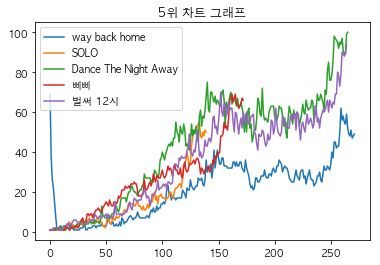

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
%matplotlib inline

rc('font',family = 'AppleGothic')



with open('bugschart.txt','r') as file:
    score1,score2,score3,score4,score5 = [],[],[],[],[]

    contents = file.readline()
    while contents != '':
        x = contents.strip('\n').split(',')
        if x[3] == a[0] :
            score1.append(int(x[1]))
        if x[3] == a[1] :
            score2.append(int(x[1]))
        if x[3] == a[2] :
            score3.append(int(x[1]))
        if x[3] == a[3] :
            score4.append(int(x[1]))
        if x[3] == a[4] :
            score5.append(int(x[1]))
        contents = file.readline()
    fig, ax = plt.subplots()

    ax.plot(score1,label="way back home")
    ax.plot(score2,label="SOLO")
    ax.plot(score3,label="Dance The Night Away")
    ax.plot(score4,label="삐삐")
    ax.plot(score5,label="벌써 12시")
    ax.legend()
    ax.set_title('5위 차트 그래프')

    plt.show()


결론 : 
숀 가수순위 : 3위
way back home 노래 순위 : 1위
- 순위 분석 : 
숀을 제외하고 모두 유명한 가수임을 알수 있다.<br>
way back home노래는 누적점수에서 2위와 약 10점인 큰 점수차이를 갖고있다.(2위~10위까지는 1점이하의 점수차이를 가진다)<br><br>

- 그래프 분석 : 
way back home을 제외하고 그래프 개형이 비슷한 것을 알 수 있다.<br>

분석 결과 유명하지 않았던 숀이 그래프 개형이 확실히 다르게 순위가 높은것을 보아 숀이 순위조작했다고 확실히 말할순 없지만 숀의 순위조작 의심은 합리적이라고 볼 수 있다. 






